# Image Classification using tf.keras

# Importing Packages

Let's start by importing required packages. **os** package is used to read files and directory structure, **numpy** is used to convert python list to numpy array and to perform required matrix operations and **matplotlib.pyplot** is used to plot the graph and display images in our training and validation data.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Loading

In order to build our image classifier, we can begin by downloading the flowers dataset.  We first need to download the archive version of the dataset and after the download we are storing it to "/tmp/" directory.

After downloading the dataset, we need to extract its contents.

In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL, 
                                   fname="flower_photos.tgz", 
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 2s 0us/step


The  dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes: 

In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

Also, The dataset we have downloaded has following directory structure. 

<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
</pre>

As you can see there are no folders containing training and validation data. Therefore, we will have to create our own training and validation set. Let's write some code that will do this. 


The code below creates a `train` and a `val` folder each containing 5 folders (one for each type of flower). It then moves the images from the original folders to these new folders such that 80% of the images go to the training set and 20% of the images go into the validation set. In the end our directory will have the following structure:


<pre style="font-size: 10.0pt; font-family: Arial; line-height: 2; letter-spacing: 1.0pt;" >
<b>flower_photos</b>
|__ <b>diasy</b>
|__ <b>dandelion</b>
|__ <b>roses</b>
|__ <b>sunflowers</b>
|__ <b>tulips</b>
|__ <b>train</b>
    |______ <b>daisy</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>dandelion</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>roses</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>sunflowers</b>: [1.jpg, 2.jpg, 3.jpg ....]
    |______ <b>tulips</b>: [1.jpg, 2.jpg, 3.jpg ....]
 |__ <b>val</b>
    |______ <b>daisy</b>: [507.jpg, 508.jpg, 509.jpg ....]
    |______ <b>dandelion</b>: [719.jpg, 720.jpg, 721.jpg ....]
    |______ <b>roses</b>: [514.jpg, 515.jpg, 516.jpg ....]
    |______ <b>sunflowers</b>: [560.jpg, 561.jpg, 562.jpg .....]
    |______ <b>tulips</b>: [640.jpg, 641.jpg, 642.jpg ....]   
</pre>

Since we don't delete the original folders, they will still be in our `flower_photos` directory, but they will be empty. The code below also prints the total number of flower images we have for each type of flower. 

In [4]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


For convenience, let us set up the path for the training and validation sets

In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Data Augmentation

Overfitting generally occurs when we have small number of training examples. One way to fix this problem is to augment our dataset so that it has sufficient number of training examples. Data augmentation takes the approach of generating more training data from existing training samples, by augmenting the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.


In [0]:
batch_size = 100
IMG_SHAPE = 150

### Random Horizontal Flip

In [7]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

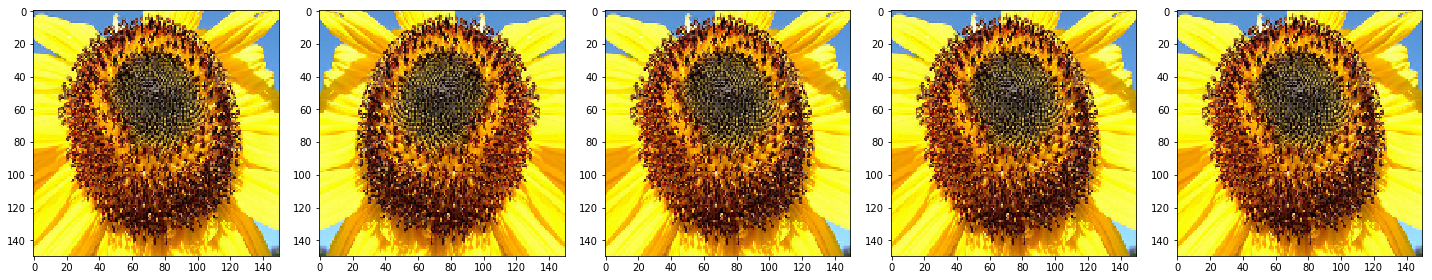

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Apply Random Rotation


In [9]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

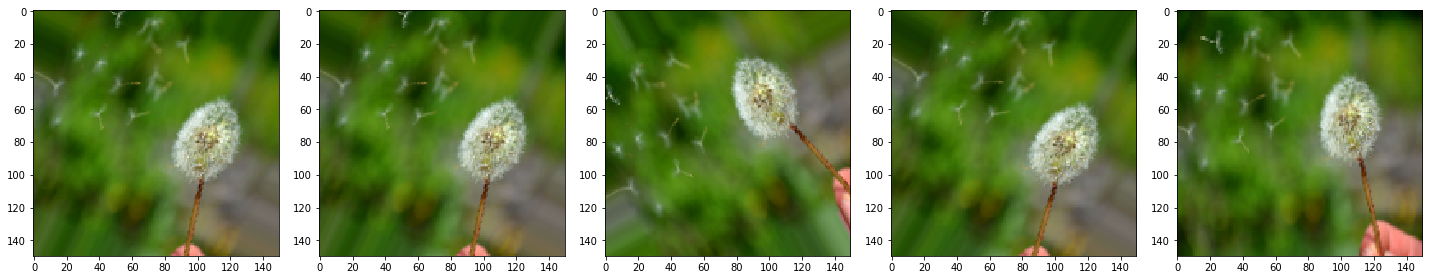

In [10]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Random Zoom


In [11]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2935 images belonging to 5 classes.


Let's take 1 sample image from our training examples and repeat it 5 times so that the augmentation can be applied to the same image 5 times over randomly, to see the augmentation in action.

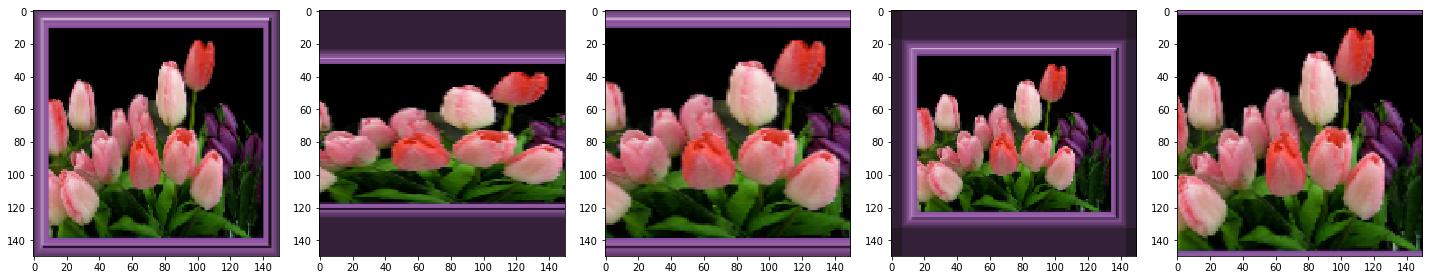

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Put It All Together


In [13]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    zoom_range=0.5,
                                    horizontal_flip=True,
                                    width_shift_range=0.15, 
                                    height_shift_range=0.15)


train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                              class_mode='sparse')

Found 2935 images belonging to 5 classes.


Let's visualize how a single image would look like 5 different times, when we pass these augmentations randomly to our dataset. 

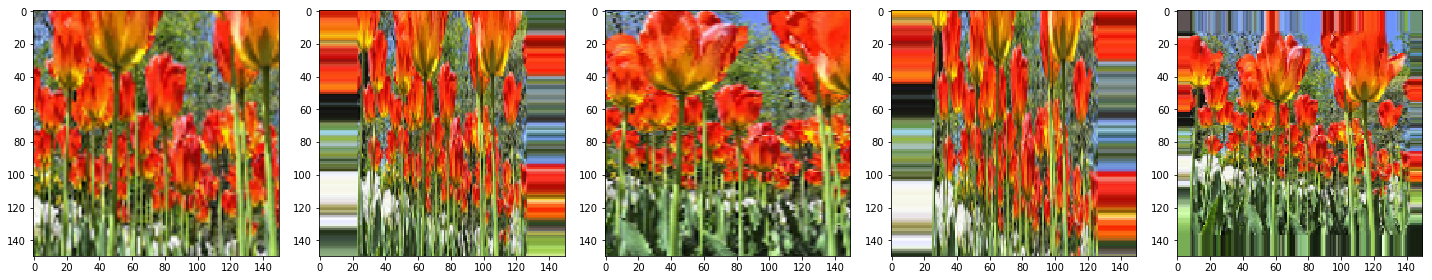

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

### Data Generator for the Validation Set


In [15]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=val_dir,
                                                target_size=(IMG_SHAPE, IMG_SHAPE),
                                                class_mode='sparse')

Found 735 images belonging to 5 classes.


# Create the CNN

A convolutional neural network that consists of 3 convolution blocks. Each convolutional block contains a `Conv2D` layer followed by a max pool layer.  The first convolutional block has 16 filters, the second one has 32 filters, and the third one has 64 filters. All convolutional filters should be 3 x 3. All max pool layers have `pool_size` of `(2, 2)` . 

After the 3 convolutional blocks there is a  flatten layer followed by a fully connected layer with 512 units. The CNN has output class probabilities based on 5 classes which is done by the **softmax** activation function. All other layers use a **relu** activation function. An added Dropout layers with a probability of 20%.

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

W0617 15:34:26.985680 139979240114048 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile the Model

In [0]:
# Compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

Train the Model


In [0]:
total_val = len(val_data_gen.filenames)
total_train = len(train_data_gen.filenames)

In [19]:
epochs = 20

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size))))


Epoch 1/20
30/30 [==============================] - 21s 691ms/step - loss: 1.5316 - acc: 0.3291 - val_loss: 1.3160 - val_acc: 0.4585
Epoch 2/20
30/30 [==============================] - 20s 653ms/step - loss: 1.1701 - acc: 0.5128 - val_loss: 1.1549 - val_acc: 0.5170
Epoch 3/20
30/30 [==============================] - 19s 649ms/step - loss: 1.0577 - acc: 0.5710 - val_loss: 1.0428 - val_acc: 0.5687
Epoch 4/20
30/30 [==============================] - 19s 649ms/step - loss: 0.9591 - acc: 0.6235 - val_loss: 0.9794 - val_acc: 0.6095
Epoch 5/20
30/30 [==============================] - 20s 651ms/step - loss: 0.8983 - acc: 0.6371 - val_loss: 0.8969 - val_acc: 0.6463
Epoch 6/20
30/30 [==============================] - 19s 641ms/step - loss: 0.8613 - acc: 0.6702 - val_loss: 0.9087 - val_acc: 0.6531
Epoch 7/20
30/30 [==============================] - 19s 649ms/step - loss: 0.8181 - acc: 0.6739 - val_loss: 0.9208 - val_acc: 0.6272
Epoch 8/20
30/30 [==============================] - 20s 653ms/step - 

Training and Validation Graphs.


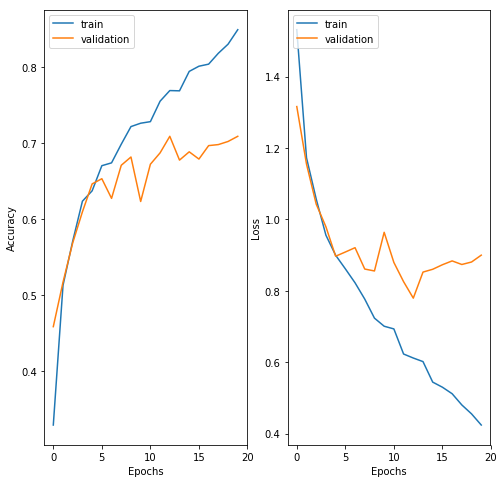

In [20]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)

plt.plot(epochs_range, acc, label='train')
plt.plot(epochs_range, val_acc, label='validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1,2,2)

plt.plot(epochs_range, loss, label='train')
plt.plot(epochs_range, val_loss, label='validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

# Experiment with Different Parameters

Currently, the model is overfitting to the test data.   In order to reduce the amount of overfitting additional image augmentation will be added to the ImageDataGenerator


In [21]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    zoom_range=0.5,
                                    horizontal_flip=True,
                                    width_shift_range=0.15, 
                                    height_shift_range=0.15,
                                    zca_whitening=True,
                                    brightness_range=(-1,1),
                                    shear_range=45)


train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                              class_mode='sparse')

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

epochs = 40

history = model2.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size))))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2935 images belonging to 5 classes.
Epoch 1/40
30/30 [==============================] - 22s 725ms/step - loss: 1.6479 - acc: 0.3257 - val_loss: 1.5375 - val_acc: 0.3265
Epoch 2/40
30/30 [==============================] - 20s 654ms/step - loss: 1.2547 - acc: 0.4661 - val_loss: 1.2400 - val_acc: 0.4898
Epoch 3/40
30/30 [==============================] - 20s 651ms/step - loss: 1.0986 - acc: 0.5458 - val_loss: 1.0765 - val_acc: 0.5850
Epoch 4/40
30/30 [==============================] - 19s 646ms/step - loss: 1.0228 - acc: 0.5945 - val_loss: 1.0856 - val_acc: 0.5592
Epoch 5/40
30/30 [==============================] - 19s 649ms/step - loss: 0.9566 - acc: 0.6252 - val_loss: 0.9926 - val_acc: 0.6068
Epoch 6/40
30/30 [==============================] - 19s 641ms/step - loss: 0.8937 - acc: 0.6521 - val_loss: 0.9431 - val_acc: 0.6299
Epoch 7/40
30/30 [==============================] - 19s 648ms/step - loss: 0.8361 - acc: 0.6804 - val_loss: 0.8920 - val_acc: 0.6599
Epoch 8/40
30/30 [=========

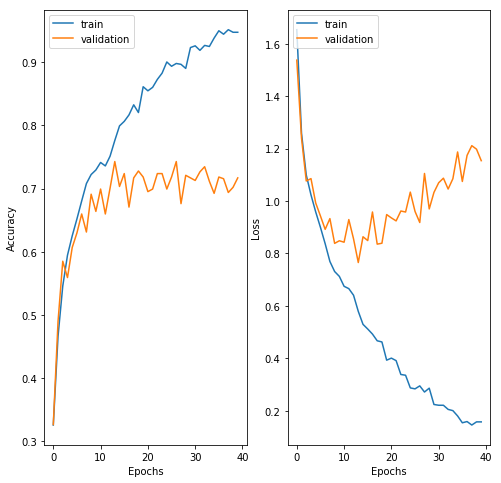

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)

plt.plot(epochs_range, acc, label='train')
plt.plot(epochs_range, val_acc, label='validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1,2,2)

plt.plot(epochs_range, loss, label='train')
plt.plot(epochs_range, val_loss, label='validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

### Additional dropout

The model is still over fitting, so two additional things will be added to help reduce the amount of overfitting:

1. early stopping
2. an additional dropout layer

In [26]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    zoom_range=0.5,
                                    horizontal_flip=True,
                                    width_shift_range=0.15, 
                                    height_shift_range=0.15,
                                    zca_whitening=True,
                                    brightness_range=(0.5,1.5),
                                    shear_range=45)


train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                              directory=train_dir,
                                              shuffle=True,
                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                              class_mode='sparse')

model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

epochs = 20

history = model3.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(batch_size))),
    epochs=epochs,
    validation_data = val_data_gen,
    validation_steps=int(np.ceil(total_val / float(batch_size))))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 2935 images belonging to 5 classes.
Epoch 1/20
30/30 [==============================] - 22s 731ms/step - loss: 1.7975 - acc: 0.3342 - val_loss: 1.2183 - val_acc: 0.4381
Epoch 2/20
30/30 [==============================] - 20s 653ms/step - loss: 1.1989 - acc: 0.4845 - val_loss: 1.2037 - val_acc: 0.4884
Epoch 3/20
30/30 [==============================] - 19s 647ms/step - loss: 1.1264 - acc: 0.5462 - val_loss: 1.0390 - val_acc: 0.5741
Epoch 4/20
30/30 [==============================] - 20s 653ms/step - loss: 1.0392 - acc: 0.5792 - val_loss: 0.9891 - val_acc: 0.6259
Epoch 5/20
30/30 [==============================] - 19s 646ms/step - loss: 0.9856 - acc: 0.6136 - val_loss: 0.9240 - val_acc: 0.6653
Epoch 6/20
30/30 [==============================] - 19s 647ms/step - loss: 0.9066 - acc: 0.6470 - val_loss: 0.8663 - val_acc: 0.6762
Epoch 7/20
30/30 [==============================] - 20s 651ms/step - loss: 0.8802 - acc: 0.6617 - val_loss: 0.9149 - val_acc: 0.6449
Epoch 8/20
30/30 [=========

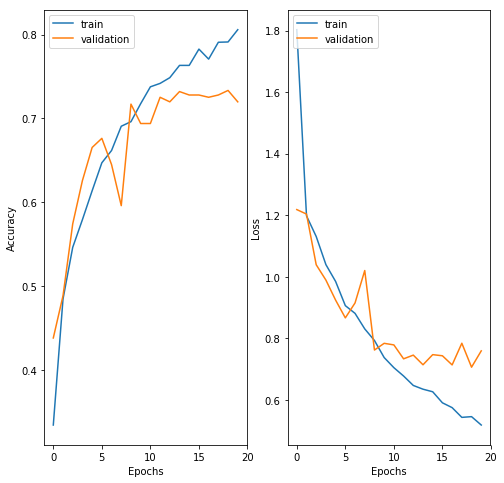

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)

plt.plot(epochs_range, acc, label='train')
plt.plot(epochs_range, val_acc, label='validation')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1,2,2)

plt.plot(epochs_range, loss, label='train')
plt.plot(epochs_range, val_loss, label='validation')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()